In [1]:
import numpy as np
import pandas as pd 
import os
i = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        i += 1
        if i < 5:
            print(os.path.join(dirname, filename))
print('Printed 5 filenames out of ', i)

/kaggle/input/end-als/end-als/genomics-data/geno_bin.csv
/kaggle/input/end-als/end-als/genomics-data/AnswerALS_subset_annovar.hg38_anno_and_geno.no_intergenic.vcf
/kaggle/input/end-als/end-als/other-data/Living with ALS - sample personas.pdf
/kaggle/input/end-als/end-als/other-data/meet_the_experts.mp4
Printed 5 filenames out of  228


In [2]:
list_fn = ['/kaggle/input/end-als/end-als/transcriptomics-data/DESeq2/bulbar_vs_limb.csv',
'/kaggle/input/end-als/end-als/transcriptomics-data/DESeq2/ctrl_vs_case.csv']
import time
t0 = time.time()
list_data_df = []
for fn in list_fn:
    d = pd.read_csv(fn)
    list_data_df.append(d)
    print('Loaded:', fn, 'shape:', d.shape)
list_data_names = [ 'bulbar_vs_limb'.replace('_',' '),  'ctrl_vs_case'.replace('_',' ') ]

print(time.time()-t0, 'seconds passed')

df = list_data_df[1]
display(df.head(1))
df_targets = df.iloc[:,:2].copy()
df_targets['Order'] = range(df.shape[0])

df_targets = df_targets.set_index(df_targets.columns[0])
for d in list_data_df[:1]:
    d = d.iloc[:,:2]
    d = d.set_index(d.columns[0])
    df_targets = df_targets.join(d, how = 'outer')
df_targets = df_targets.sort_values('Order')
df_targets = df_targets.drop(columns = 'Order')
df_targets.columns = ['ctrl_vs_case'.replace('_',' '), 'bulbar_vs_limb'.replace('_',' ') ]
df_targets   

Loaded: /kaggle/input/end-als/end-als/transcriptomics-data/DESeq2/bulbar_vs_limb.csv shape: (112, 53861)
Loaded: /kaggle/input/end-als/end-als/transcriptomics-data/DESeq2/ctrl_vs_case.csv shape: (163, 53861)
32.59155011177063 seconds passed


,Participant_ID,CtrlVsCase_Classifier,DDX11L1,WASH7P,MIR6859.1,MIR1302.2HG,FAM138A,OR4G11P,OR4F5,AL627309.1,...,AC023491.1,AC004556.3,ENSG00000278246,AC240274.1,ENSG00000278033,U1.4,U1.5,AC213203.2,AC213203.1,ENSG00000278858
0,NEUAB000NKC,1,0.0,188.401759,32.563267,1.162974,0.0,0.0,0.0,5.814869,...,0.0,2.325948,0.0,384.944335,0.0,94.20088,2.325948,5.814869,0.0,0.0


,ctrl vs case,bulbar vs limb
Participant_ID,,
NEUAB000NKC,1,1.0
NEUAE993EPR,1,NaN
NEUAF553MJ3,1,0.0
NEUAG603XLK,1,1.0
NEUAM655HF7,1,1.0
...,...,...
NEUUV825HYF,0,NaN
NEUVZ050YX7,0,NaN
NEUWT164JRQ,0,NaN


In [3]:
# check: 
(df.iloc[:,1].values != df_targets.iloc[:,0].values ) .sum() # Check 

0

In [4]:
df.head(1)

,Participant_ID,CtrlVsCase_Classifier,DDX11L1,WASH7P,MIR6859.1,MIR1302.2HG,FAM138A,OR4G11P,OR4F5,AL627309.1,...,AC023491.1,AC004556.3,ENSG00000278246,AC240274.1,ENSG00000278033,U1.4,U1.5,AC213203.2,AC213203.1,ENSG00000278858
0,NEUAB000NKC,1,0.0,188.401759,32.563267,1.162974,0.0,0.0,0.0,5.814869,...,0.0,2.325948,0.0,384.944335,0.0,94.20088,2.325948,5.814869,0.0,0.0


In [5]:
df_targets.describe()

,ctrl vs case,bulbar vs limb
count,163.000000,112.000000
mean,0.815951,0.732143
std,0.388718,0.444833
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


# Dimensional reduction by PCA for *Ctrl vs Case* and *Bulbar vs Limb*

Top 10 explained_variance_ratio_ [0.51379462 0.1773511  0.10042276 0.08417828 0.03358343 0.01798279
 0.01203276 0.0064671  0.00615886 0.00507206]
Top 10 singular_values_ [2692382.56243095 1581826.80725136 1190304.46866108 1089788.00299715
  688342.38518677  503698.35046227  412025.99755371  302062.48818924
  294776.02070709  267506.51736825]
2.8137807846069336 seconds passed


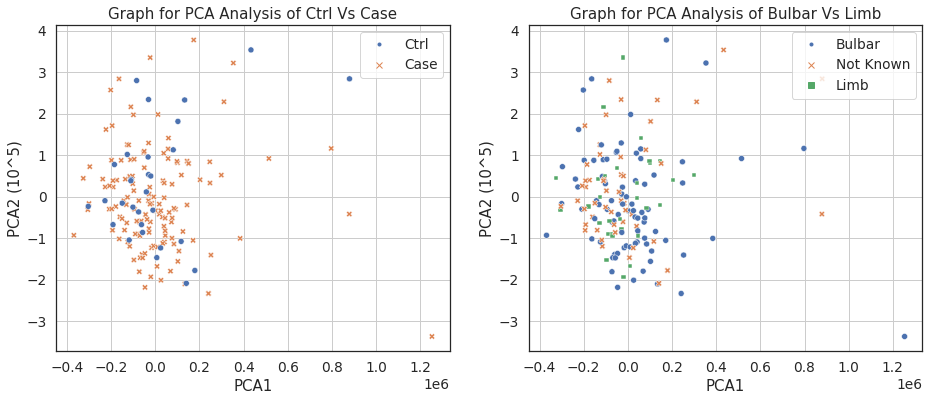

3.4950575828552246 seconds passed. Finished.


In [6]:
import time

import matplotlib.pyplot as plt
import seaborn as sns

import umap
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

t0 = time.time()

X = df.iloc[:,2:].values
pca = PCA()# n_components=2)
r = pca.fit_transform(X)
print('Top 10 explained_variance_ratio_', pca.explained_variance_ratio_[:10])
print('Top 10 singular_values_', pca.singular_values_[:10])

print(time.time() - t0,'seconds passed')

fig = plt.figure(figsize = (24,6) ); c = 0
sns.set(font_scale=1.25,style="white")
for i,col in enumerate(df_targets.columns):
        data_name = col # list_names[i]
        y = df_targets[col].copy()# d.iloc[:,1].values
        y = y.fillna('NAN')
        y = y.values

        c += 1; fig.add_subplot(1,3,c)
        sns.scatterplot(x = r[:,0], y = r[:,1]/100000 , hue = y,style=y)
        #sns.lmplot(data=r, hue = y)
        #sns.lmplot(x = r[:,0], y = r[:,1]/100000 , hue = y)
        plt.title("Graph for PCA Analysis of "+data_name.title())
        plt.grid()
        plt.xlabel('PCA1')
        plt.ylabel('PCA2 (10^5)')
        if i<1:
            
            custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
                          Line2D([], [], marker='x', color='#DD8452', linestyle='None')]
            plt.legend(custom, ['Ctrl', 'Case'])
        else:
            custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
                      Line2D([], [], marker='x', color='#DD8452', linestyle='None'), 
                        Line2D([], [], marker='s', color='g', linestyle='None')]
            plt.legend(custom, ['Bulbar', 'Not Known','Limb'])
    
    #print(time.time() - t0,'seconds passed')
plt.show()
print(time.time() - t0,'seconds passed. Finished.')

